In [1]:
%cd "c:\users\ehecht\documents\pythonScripts\H2 codes and standards\plotsForNickB\plot for Korea Prezo"

c:\users\ehecht\documents\pythonScripts\H2 codes and standards\plotsForNickB\plot for Korea Prezo


In [2]:
from h2_jet import Jet
from h2_comps import Gas, Orifice
from h2_therm import AbelNoble
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
H2 = Gas(AbelNoble(), T = 298, P = 10000000)
air = Gas(AbelNoble(b = 0, MW = 28.), T = 298, P = 101325)
o = Orifice(d = .001)
jet = Jet(H2, o, air, nnmodel = 'Birch2')
jet.solve(Ymin = .0005, dS = .01, max_steps = 10000, tol = 1e-6)

solving for the plume... done.
solving for the plume... done.


<h2_jet.Jet instance at 0x000000000967B888>

h2_jet.py:644: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax.set_axis_bgcolor(plt.cm.get_cmap()(0))
c:\program files\python\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'lw'
  s)


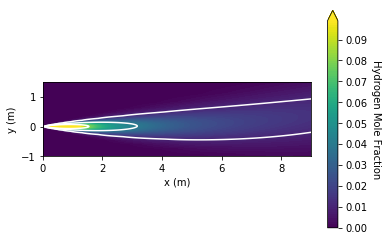

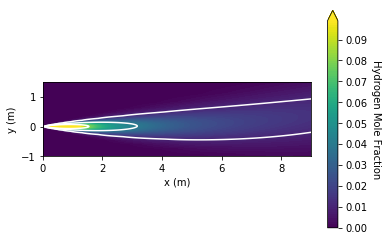

In [4]:
jet.plot_moleFrac_Contour(mark = [.01, .04, .08], xlims=[ 0,9 ], ylims=[ -1,1.5 ])

In [6]:
from mpl_toolkits.axes_grid1 import ImageGrid

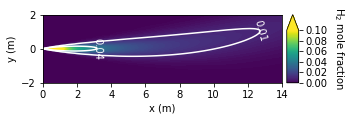

In [10]:
fig = figure(figsize = (5, 2))
grid = ImageGrid(fig, 111, (1,1),
                 axes_pad = 0.1, 
                 cbar_location = 'right',
                 cbar_mode = 'each', 
                 cbar_size = '5%',
                 cbar_pad = '2%')
x, y, X, Y = jet._contourdata()
cp = grid[0].contourf(x, y, X, np.arange(0, .101, 0.001), extend='max');
cp1 = grid[0].contour(x, y, X, levels = [ .01, .04,], colors = 'w', lw = 2);
grid[0].set_ylim(-2, 2); grid[0].set_xlim(0, 14); grid[0].set_aspect(1);
clabel(cp1, cp1.levels, inline=False, fmt = '%.2f', inline_spacing = 0, rightside_up = True)
cb0 = colorbar(cp, cax = grid.cbar_axes[0], extendfrac=.3);
cb0.set_ticks([0, .02, .04, .06, .08, .1])
cb0.set_label('H$_2$ mole fraction', rotation = -90, va = 'bottom')
grid[0].set_xlabel('x (m)');grid[0].set_ylabel('y (m)');
tight_layout()
savefig('example_contour_plot.png', transparent = True, dpi = 200)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
mpl.style.use('default')
mpl.rcParams['image.cmap'] = 'jet'

In [ ]:
import os
from h2_comps import *
from h2_jet import *
from h2_therm import *
from scipy.stats import norm
from plume_wrapper import PlumeWrap
import sys

ambient_pressure=101325
ambient_temperature=288.15
H2_pressure=10000000
H2_temperature=287.8
orifice_diameter=0.001
orifice_discharge_coefficient=1
angle_of_jet=0
directory=os.getcwd()
Xlims=[ 0,9 ]
Ylims=[ -1,1.5 ]
plot_title=" "
contours=[ .01, .04, .08 ]
result=[]

result.append(PlumeWrap(ambient_pressure, ambient_temperature, H2_pressure, H2_temperature, orifice_diameter, orifice_discharge_coefficient, angle_of_jet, directory, Xlims, Ylims, plot_title, contours))

print("result={" + str(result) + "}") 